In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Datasets/forbes_2022_billionaires.csv')

In [3]:
df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [4]:
df.shape

(2668, 22)

In [5]:
df.columns

Index(['rank', 'personName', 'age', 'finalWorth', 'year', 'month', 'category',
       'source', 'country', 'state', 'city', 'countryOfCitizenship',
       'organization', 'selfMade', 'gender', 'birthDate', 'title',
       'philanthropyScore', 'residenceMsa', 'numberOfSiblings', 'bio',
       'about'],
      dtype='object')

In [6]:
df.dtypes

rank                      int64
personName               object
age                     float64
finalWorth              float64
year                      int64
month                     int64
category                 object
source                   object
country                  object
state                    object
city                     object
countryOfCitizenship     object
organization             object
selfMade                   bool
gender                   object
birthDate                object
title                    object
philanthropyScore       float64
residenceMsa             object
numberOfSiblings        float64
bio                      object
about                    object
dtype: object

In [7]:
df['philanthropyScore'].value_counts()

philanthropyScore
1.0    176
2.0    135
3.0     60
4.0     16
5.0      9
Name: count, dtype: int64

In [8]:
df['philanthropyScore'].isna().sum()

np.int64(2272)

##### Data Preprocessing

In [9]:
df = df.loc[:, ["rank","personName","age","finalWorth","category","country","gender"]]

In [10]:
df.head()

,rank,personName,age,finalWorth,category,country,gender
0,1,Elon Musk,50.0,219000.0,Automotive,United States,M
1,2,Jeff Bezos,58.0,171000.0,Technology,United States,M
2,3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
3,4,Bill Gates,66.0,129000.0,Technology,United States,M
4,5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M


In [11]:
# df = df.rename(columns={"rank":"Sıra","personName":"İsim","age":"Yaş",
#                       "finalWorth":"Servet","category":"Kategori",
#                        "country":"Ülke", "gender":"Cinsiyet"})

In [12]:
df = df.set_index('rank')

In [13]:
df.head()

,personName,age,finalWorth,category,country,gender
rank,,,,,,
1,Elon Musk,50.0,219000.0,Automotive,United States,M
2,Jeff Bezos,58.0,171000.0,Technology,United States,M
3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
4,Bill Gates,66.0,129000.0,Technology,United States,M
5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M


In [14]:
df.dtypes

personName     object
age           float64
finalWorth    float64
category       object
country        object
gender         object
dtype: object

In [15]:
df.isnull().sum()

personName     0
age           86
finalWorth     0
category       0
country       13
gender        16
dtype: int64

In [16]:
df = df.dropna()

In [17]:
df.shape

(2568, 6)

In [18]:
df.columns

Index(['personName', 'age', 'finalWorth', 'category', 'country', 'gender'], dtype='object')

In [19]:
df['gender'].value_counts()

gender
M    2282
F     286
Name: count, dtype: int64

In [20]:
df['gender'].value_counts(normalize=True)

gender
M    0.888629
F    0.111371
Name: proportion, dtype: float64

In [21]:
df[df['country'] == 'Turkey'].gender.value_counts(normalize=True)

gender
M    0.826087
F    0.173913
Name: proportion, dtype: float64

In [22]:
df['country'].unique()

array(['United States', 'France', 'India', 'Mexico', 'China', 'Singapore',
       'Spain', 'Canada', 'Germany', 'Switzerland', 'Belgium',
       'Hong Kong', 'United Kingdom', 'Australia', 'Austria', 'Italy',
       'Japan', 'Bahamas', 'Indonesia', 'Chile', 'Russia', 'Sweden',
       'Czechia', 'Monaco', 'United Arab Emirates', 'Nigeria', 'Denmark',
       'Thailand', 'Malaysia', 'Brazil', 'Colombia', 'New Zealand',
       'South Korea', 'South Africa', 'Philippines', 'Egypt', 'Taiwan',
       'Israel', 'Vietnam', 'Poland', 'Norway', 'Cayman Islands',
       'Netherlands', 'Eswatini (Swaziland)', 'Peru', 'Algeria',
       'Kazakhstan', 'Georgia', 'Portugal', 'British Virgin Islands',
       'Turkey', 'Finland', 'Ukraine', 'Ireland', 'Bermuda', 'Lebanon',
       'Argentina', 'Cambodia', 'Oman', 'Guernsey', 'Liechtenstein',
       'Turks and Caicos Islands', 'Qatar', 'Morocco', 'Uruguay',
       'Slovakia', 'Romania', 'Nepal', 'Tanzania', 'Bahrain', 'Greece',
       'Hungary', 'Andorra']

In [23]:
df[df['country'] == 'India']

,personName,age,finalWorth,category,country,gender
rank,,,,,,
10,Mukesh Ambani,64.0,90700.0,Diversified,India,M
11,Gautam Adani & family,59.0,90000.0,Diversified,India,M
47,Shiv Nadar,76.0,28700.0,Technology,India,M
56,Cyrus Poonawalla,80.0,24300.0,Healthcare,India,M
81,Radhakishan Damani,67.0,20000.0,Fashion & Retail,India,M
...,...,...,...,...,...,...
2578,G.V. Prasad,61.0,1000.0,Healthcare,India,M
2578,Jupally Rameshwar Rao,66.0,1000.0,Real Estate,India,M
2578,Dhruv Sawhney,77.0,1000.0,Construction & Engineering,India,M


In [24]:
df[df['country'] == 'United States'] 

,personName,age,finalWorth,category,country,gender
rank,,,,,,
1,Elon Musk,50.0,219000.0,Automotive,United States,M
2,Jeff Bezos,58.0,171000.0,Technology,United States,M
4,Bill Gates,66.0,129000.0,Technology,United States,M
5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M
6,Larry Page,49.0,111000.0,Technology,United States,M
...,...,...,...,...,...,...
2578,Mike Speiser,51.0,1000.0,Technology,United States,M
2578,Jeff Sprecher,67.0,1000.0,Finance & Investments,United States,M
2578,Axel Stawski,71.0,1000.0,Real Estate,United States,M


In [25]:
df_gender = df.groupby('gender')

In [26]:
df_gender['age'].mean()

gender
F    62.937063
M    64.409290
Name: age, dtype: float64

In [27]:
import seaborn as sns
sns.set_theme()
sns.set(rc = {'figure.dpi': 300})
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='gender'>

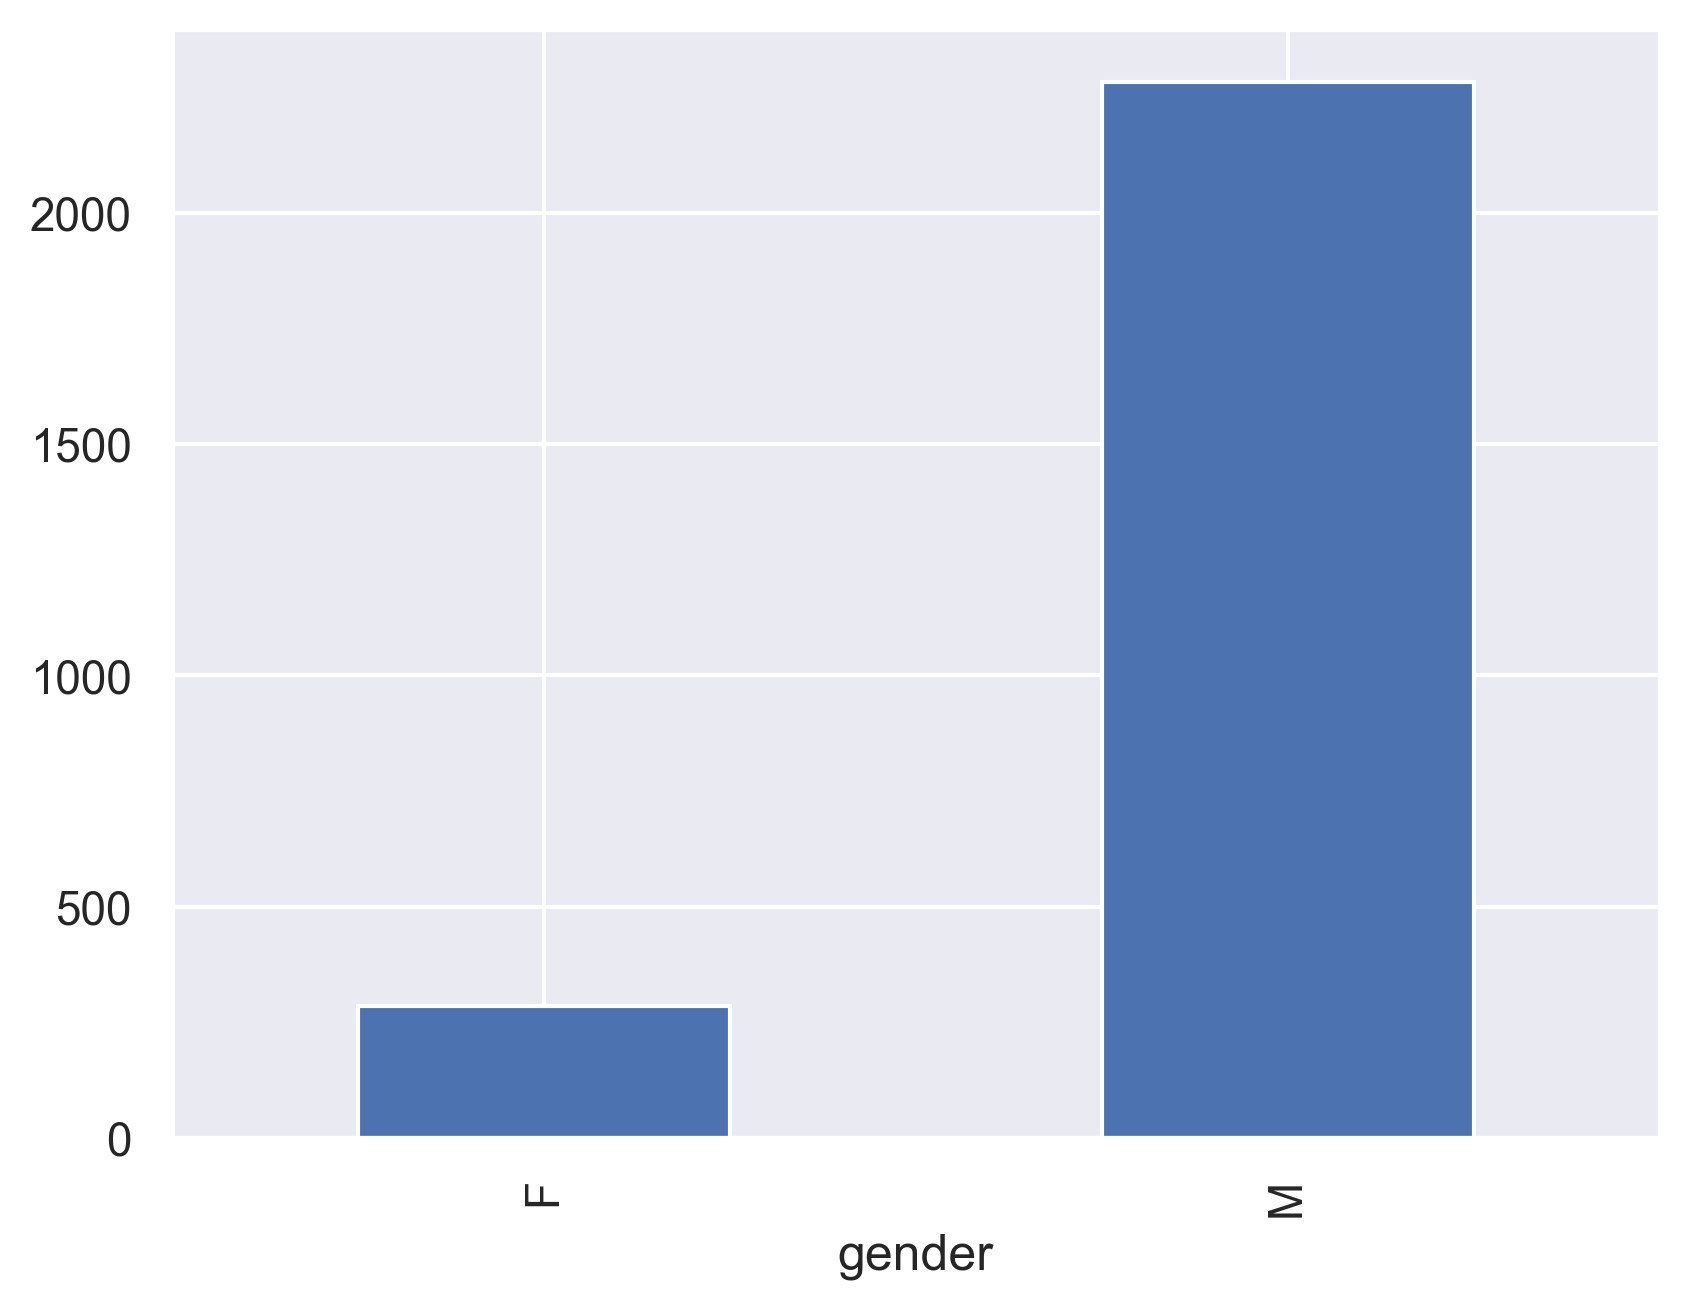

In [28]:
df_gender.size().plot(kind = 'bar')

##### Who are the top 10 Richest in the World?

In [29]:
df.head()

,personName,age,finalWorth,category,country,gender
rank,,,,,,
1,Elon Musk,50.0,219000.0,Automotive,United States,M
2,Jeff Bezos,58.0,171000.0,Technology,United States,M
3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
4,Bill Gates,66.0,129000.0,Technology,United States,M
5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M


In [30]:
top_10 = df.sort_values(by='finalWorth', ascending=False)[:10]

In [31]:
top_10

,personName,age,finalWorth,category,country,gender
rank,,,,,,
1,Elon Musk,50.0,219000.0,Automotive,United States,M
2,Jeff Bezos,58.0,171000.0,Technology,United States,M
3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
4,Bill Gates,66.0,129000.0,Technology,United States,M
5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M
6,Larry Page,49.0,111000.0,Technology,United States,M
7,Sergey Brin,48.0,107000.0,Technology,United States,M
8,Larry Ellison,77.0,106000.0,Technology,United States,M
9,Steve Ballmer,66.0,91400.0,Technology,United States,M


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

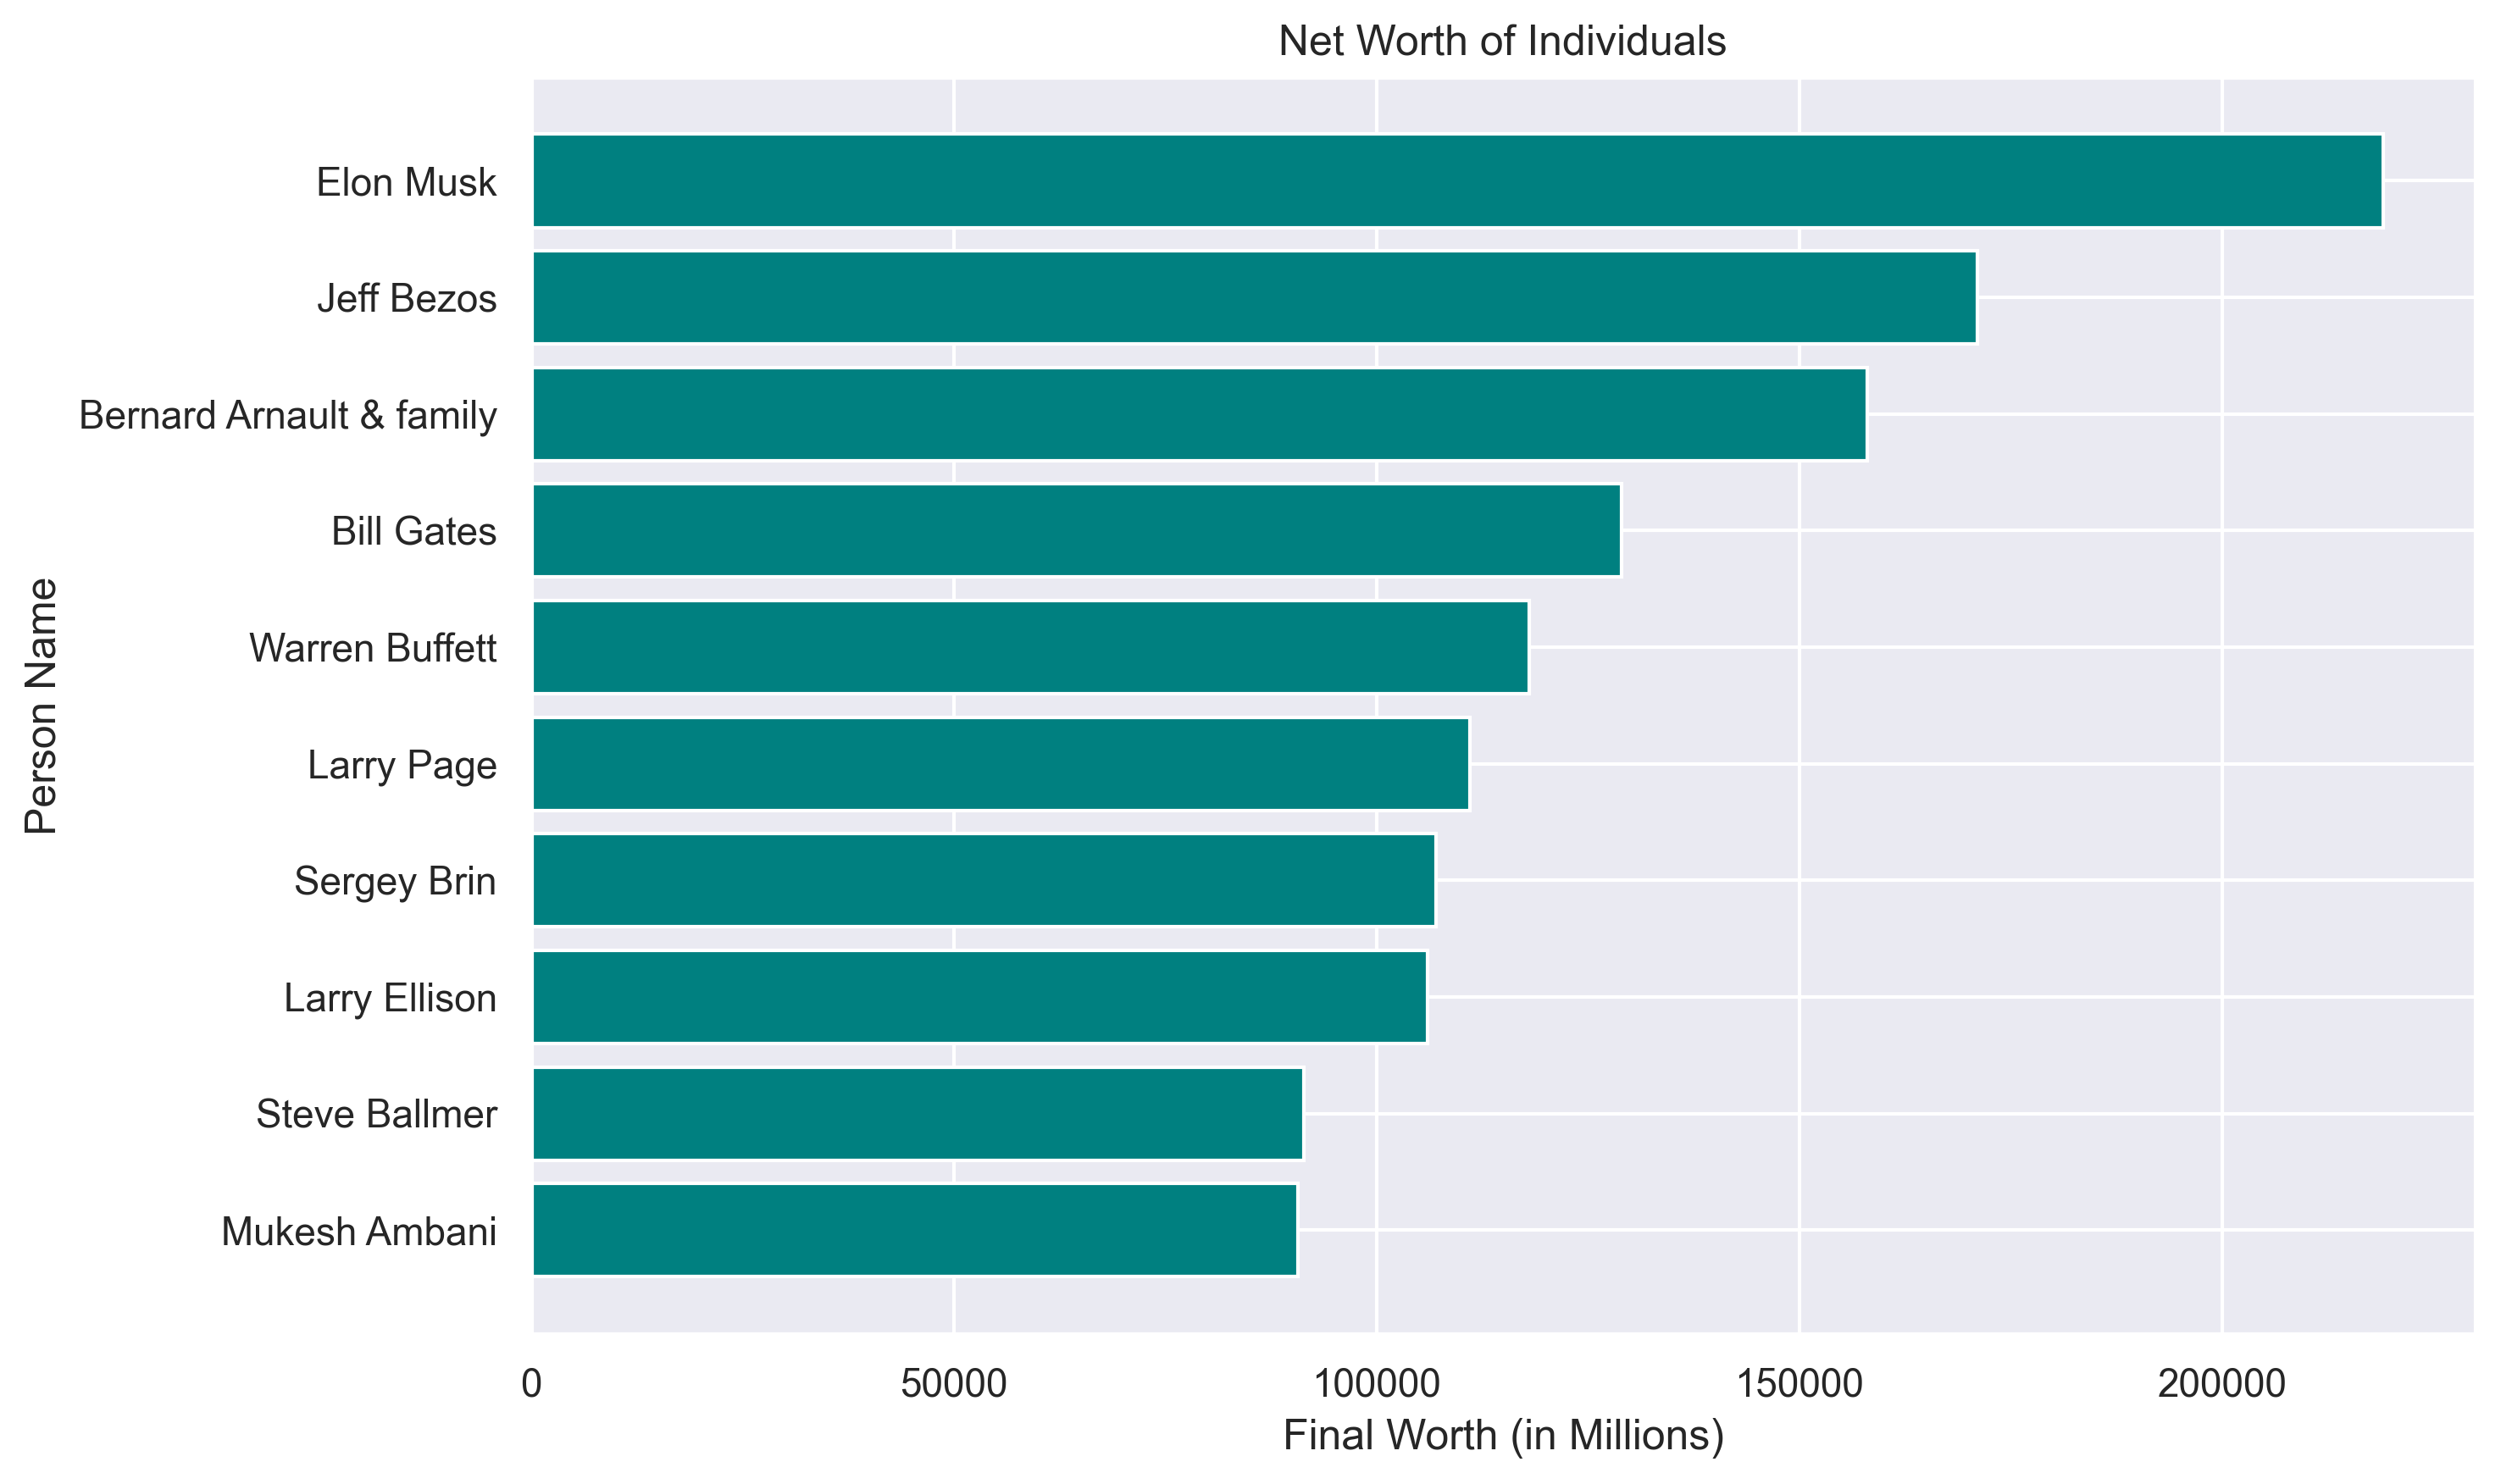

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Horizontal bar chart
plt.barh(top_10['personName'], top_10['finalWorth'], color='teal')

plt.title('Net Worth of Individuals')
plt.xlabel('Final Worth (in Millions)')
plt.ylabel('Person Name')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Which country has the highest number of billionaires?

In [34]:
grouped_country = df.groupby('country')
grouped_country

In [35]:
country_max_billionaires = grouped_country.size().sort_values(ascending=False)[:10]

In [36]:
country_max_billionaires

country
United States     742
China             546
India             154
Germany            94
United Kingdom     81
Switzerland        70
Hong Kong          66
Russia             65
Brazil             53
Italy              49
dtype: int64

In [37]:
co_max_bill = pd.DataFrame(
    country_max_billionaires,
    columns = ['frequency']
)

In [38]:
co_max_bill

,frequency
country,
United States,742
China,546
India,154
Germany,94
United Kingdom,81
Switzerland,70
Hong Kong,66
Russia,65
Brazil,53


Text(0, 0.5, 'Country')

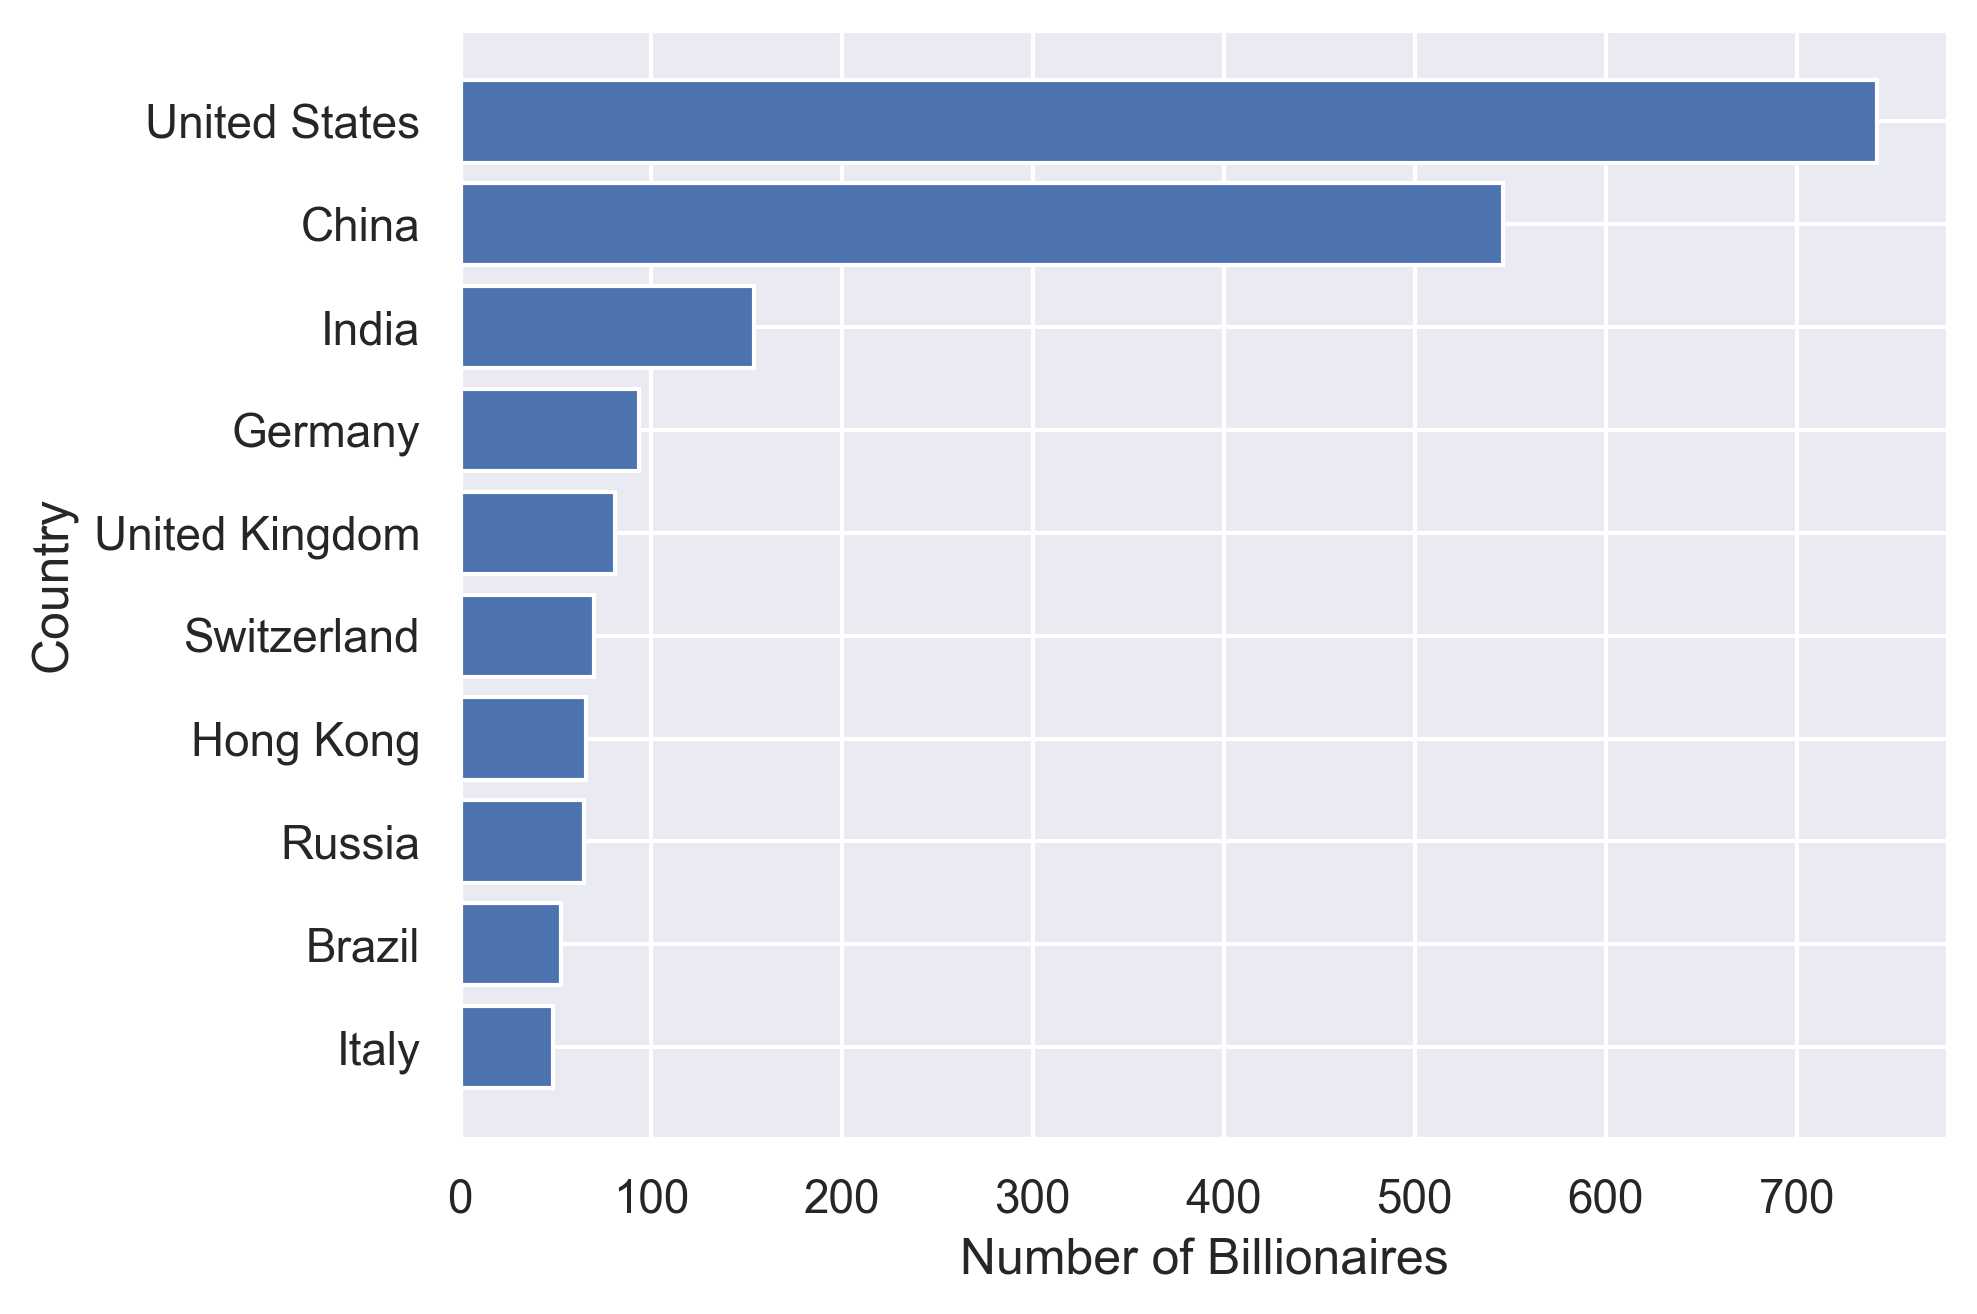

In [39]:
plt.barh(co_max_bill.index, co_max_bill['frequency'])
plt.gca().invert_yaxis()
plt.xlabel("Number of Billionaires")
plt.ylabel("Country")

Who are the Top 10 richest in the Turkey?

In [40]:
richest_turkey =  df[df['country'] == 'Turkey'].sort_values(by='finalWorth', ascending=False)[:10]

Text(0.5, 0, 'Net Worth($)')

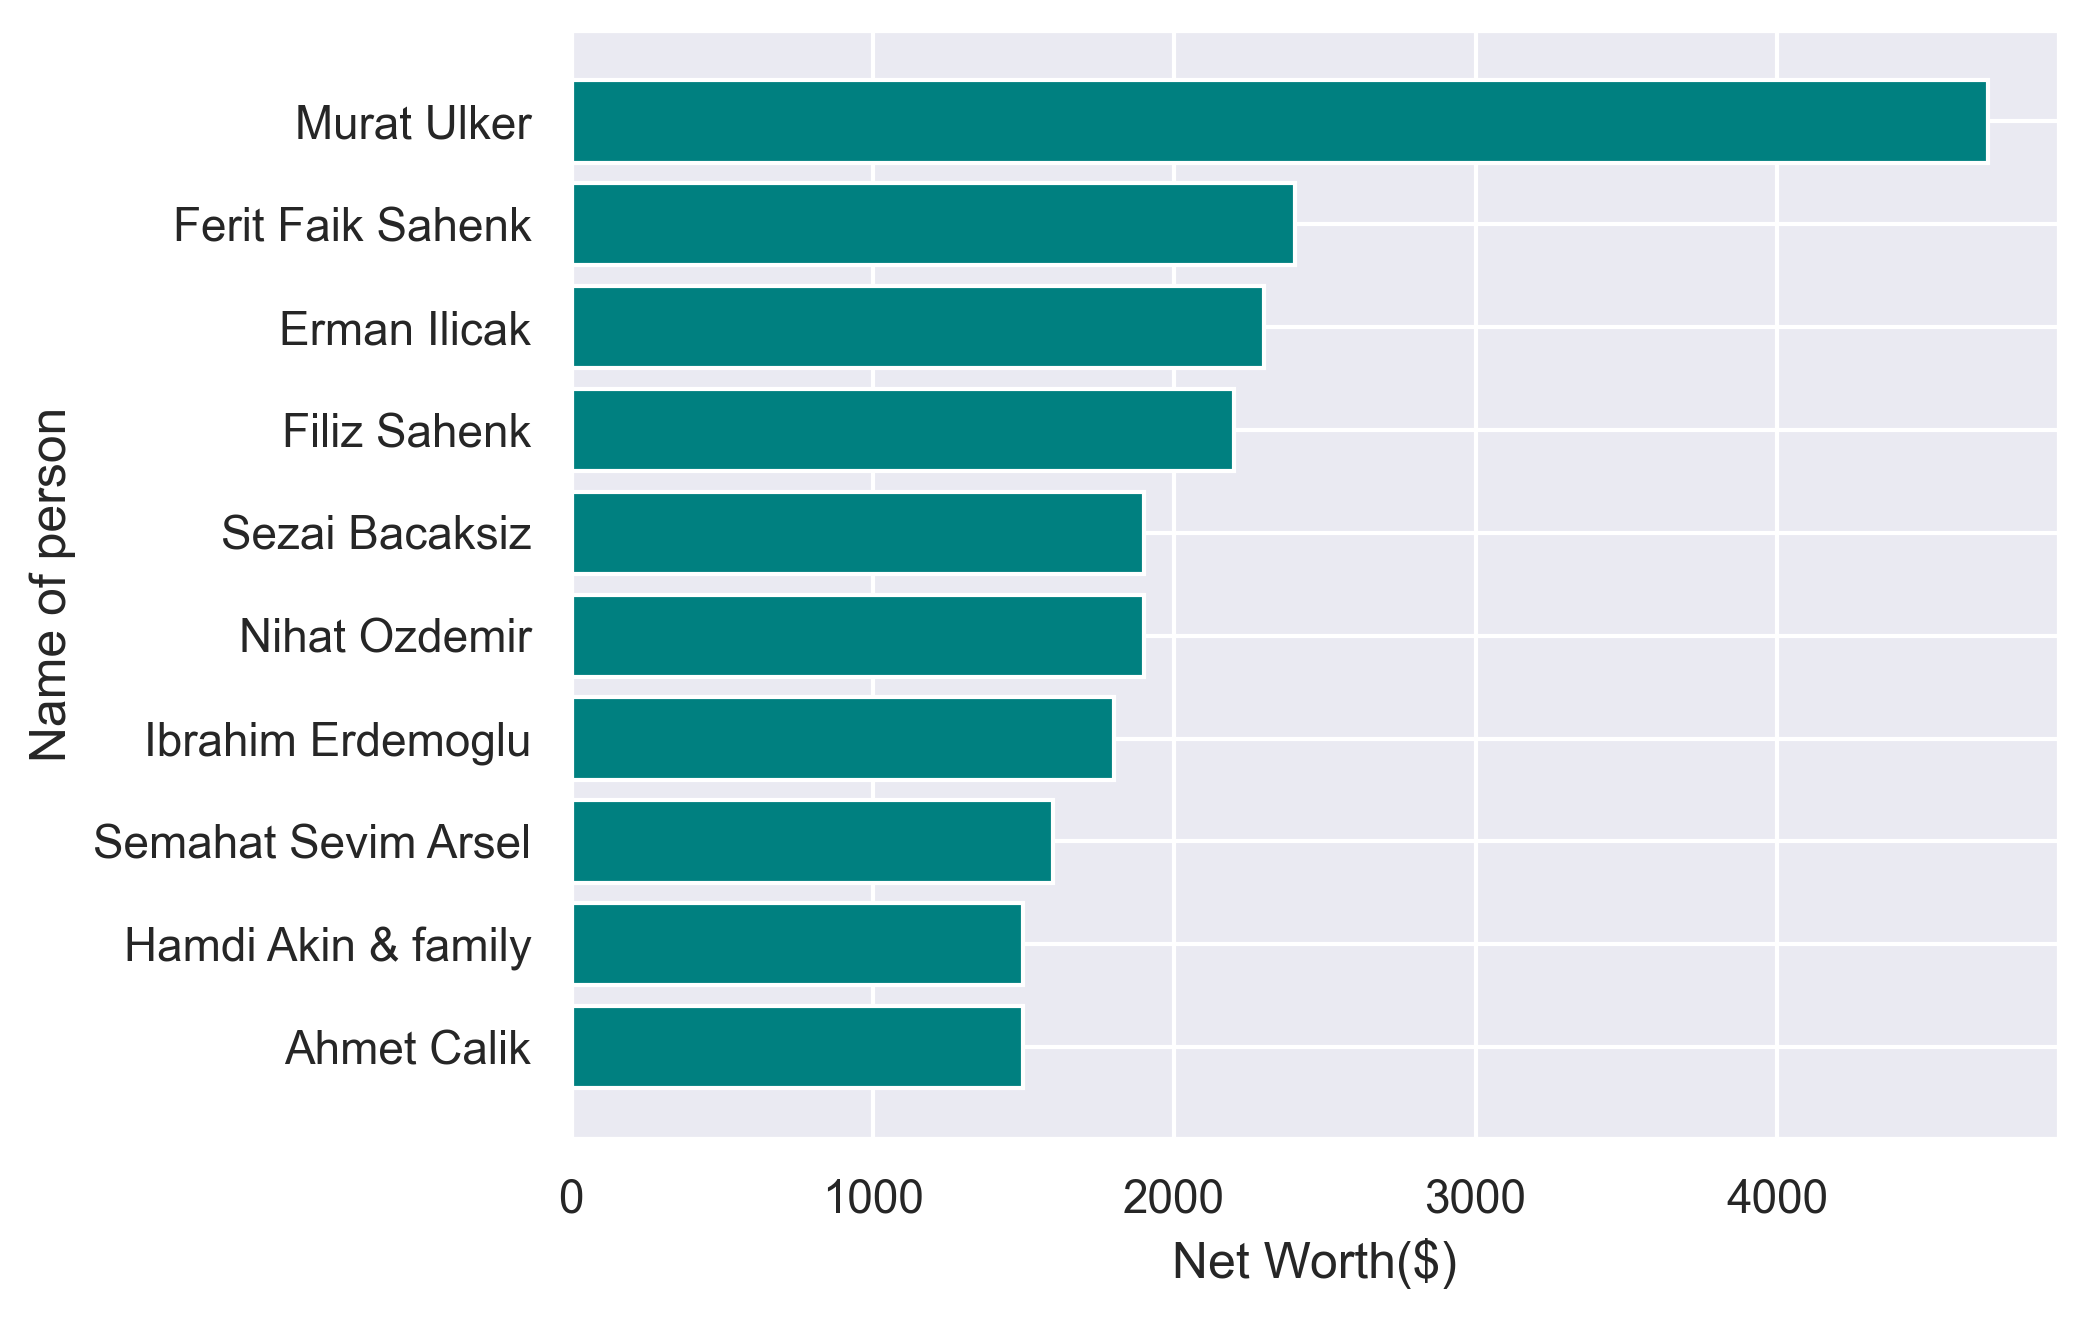

In [46]:
plt.barh(richest_turkey['personName'], richest_turkey['finalWorth'], color = 'teal')
plt.gca().invert_yaxis()
plt.ylabel('Name of person')
plt.xlabel('Net Worth($)')

Which Industry has the most billionaires in it?

In [55]:
df_category = pd.DataFrame(
    df['category'].value_counts()[:10]
)

In [56]:
df_category

,count
category,
Finance & Investments,381
Technology,332
Manufacturing,319
Fashion & Retail,238
Healthcare,209
Food & Beverage,193
Real Estate,187
Diversified,174
Media & Entertainment,95


<Axes: xlabel='count', ylabel='category'>

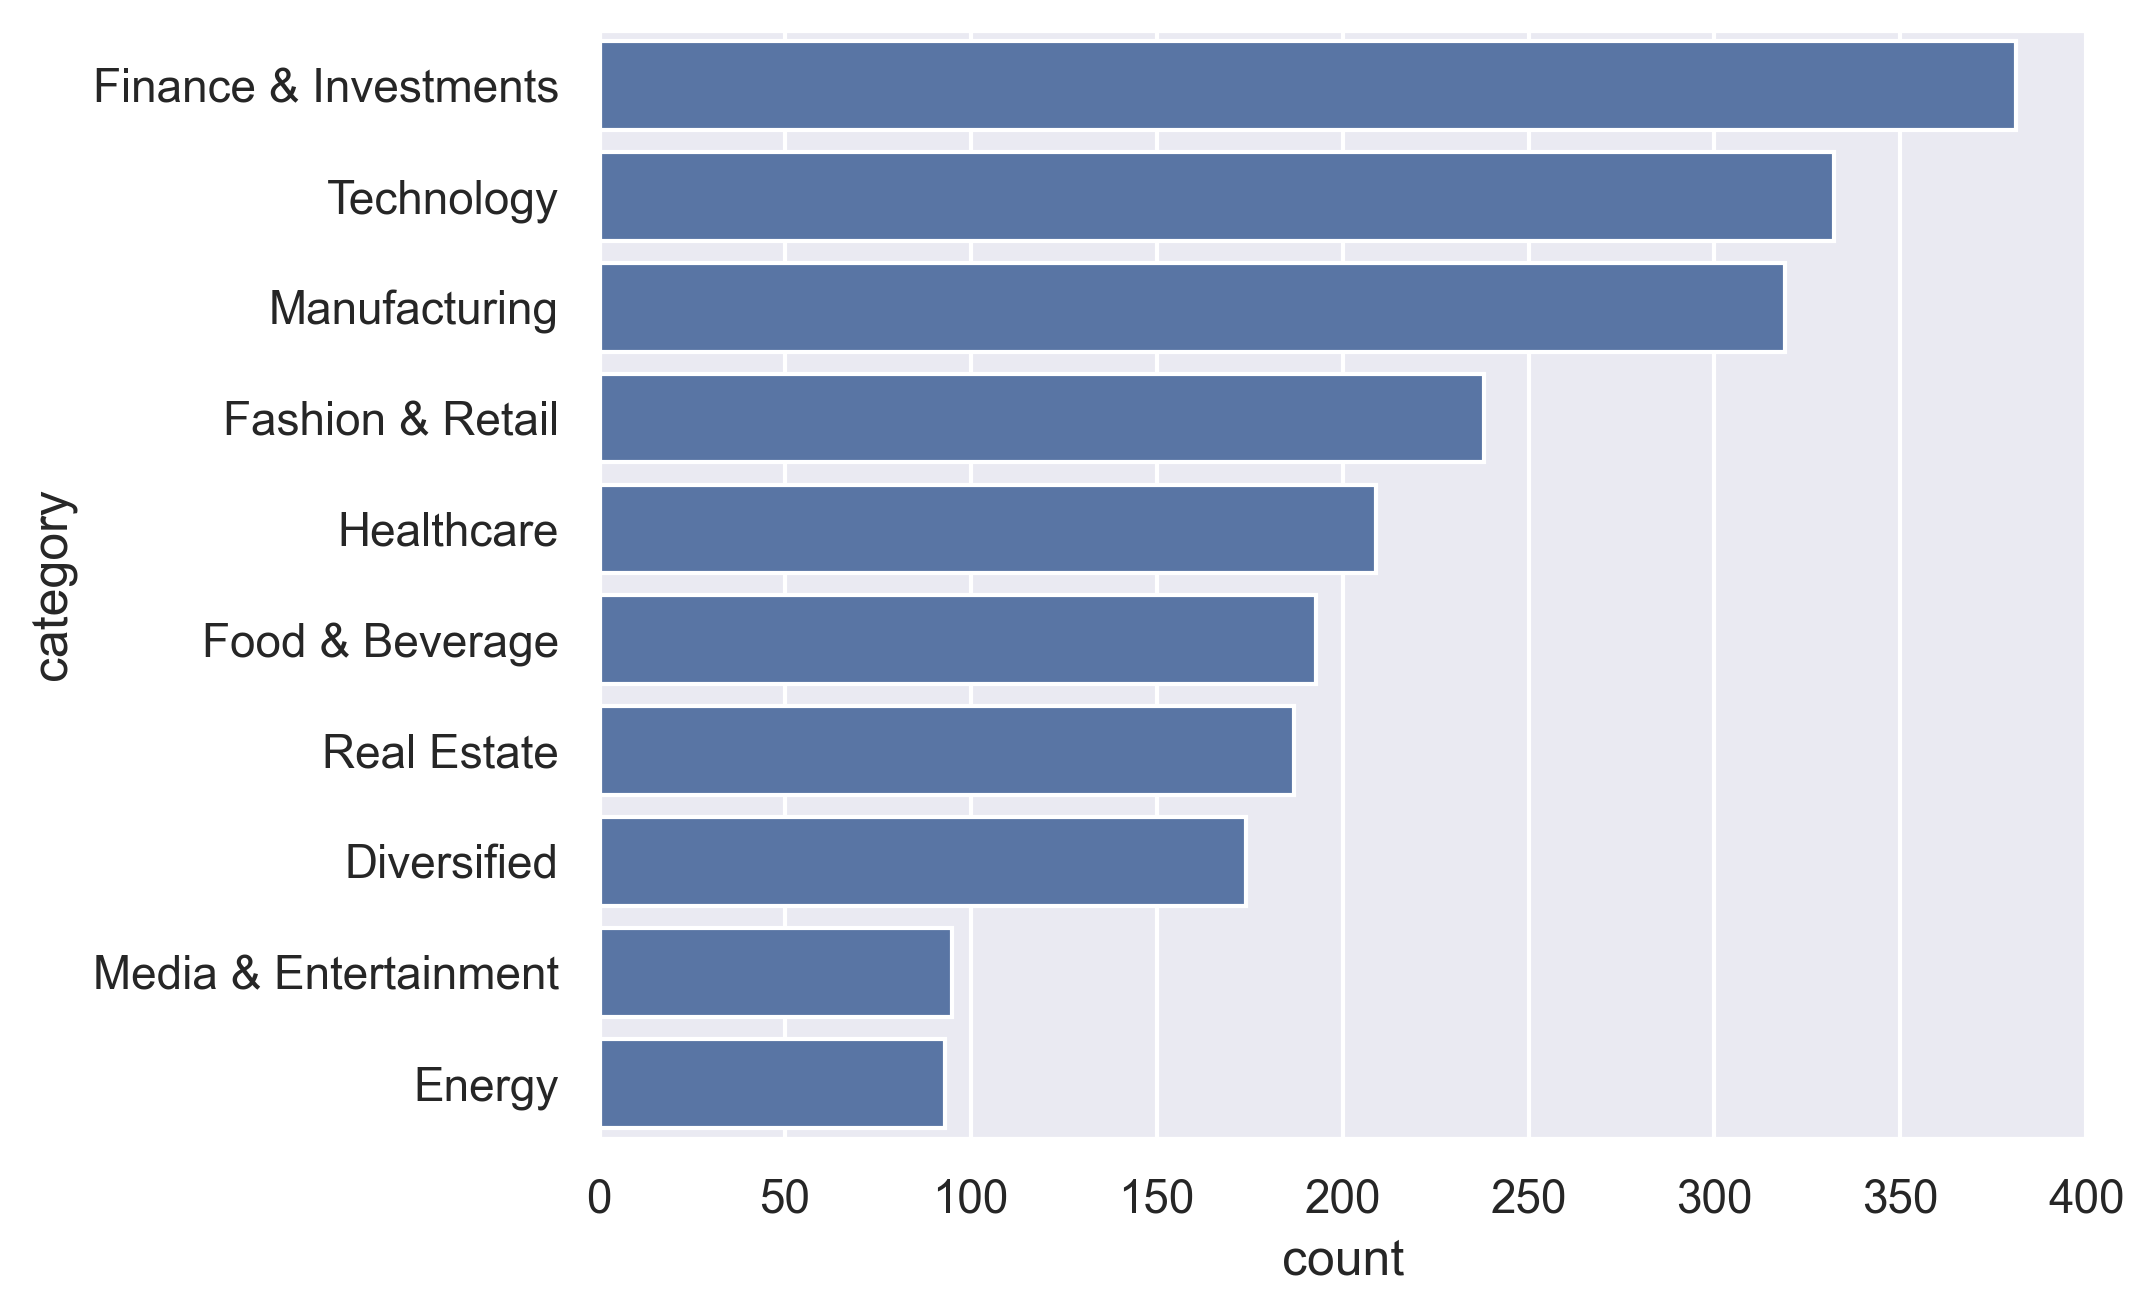

In [57]:
sns.barplot(x = df_category['count'], y = df_category.index)

Is there a relationship between money and age?

In [59]:
df.head()

,personName,age,finalWorth,category,country,gender
rank,,,,,,
1,Elon Musk,50.0,219000.0,Automotive,United States,M
2,Jeff Bezos,58.0,171000.0,Technology,United States,M
3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
4,Bill Gates,66.0,129000.0,Technology,United States,M
5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M


<Axes: xlabel='age', ylabel='finalWorth'>

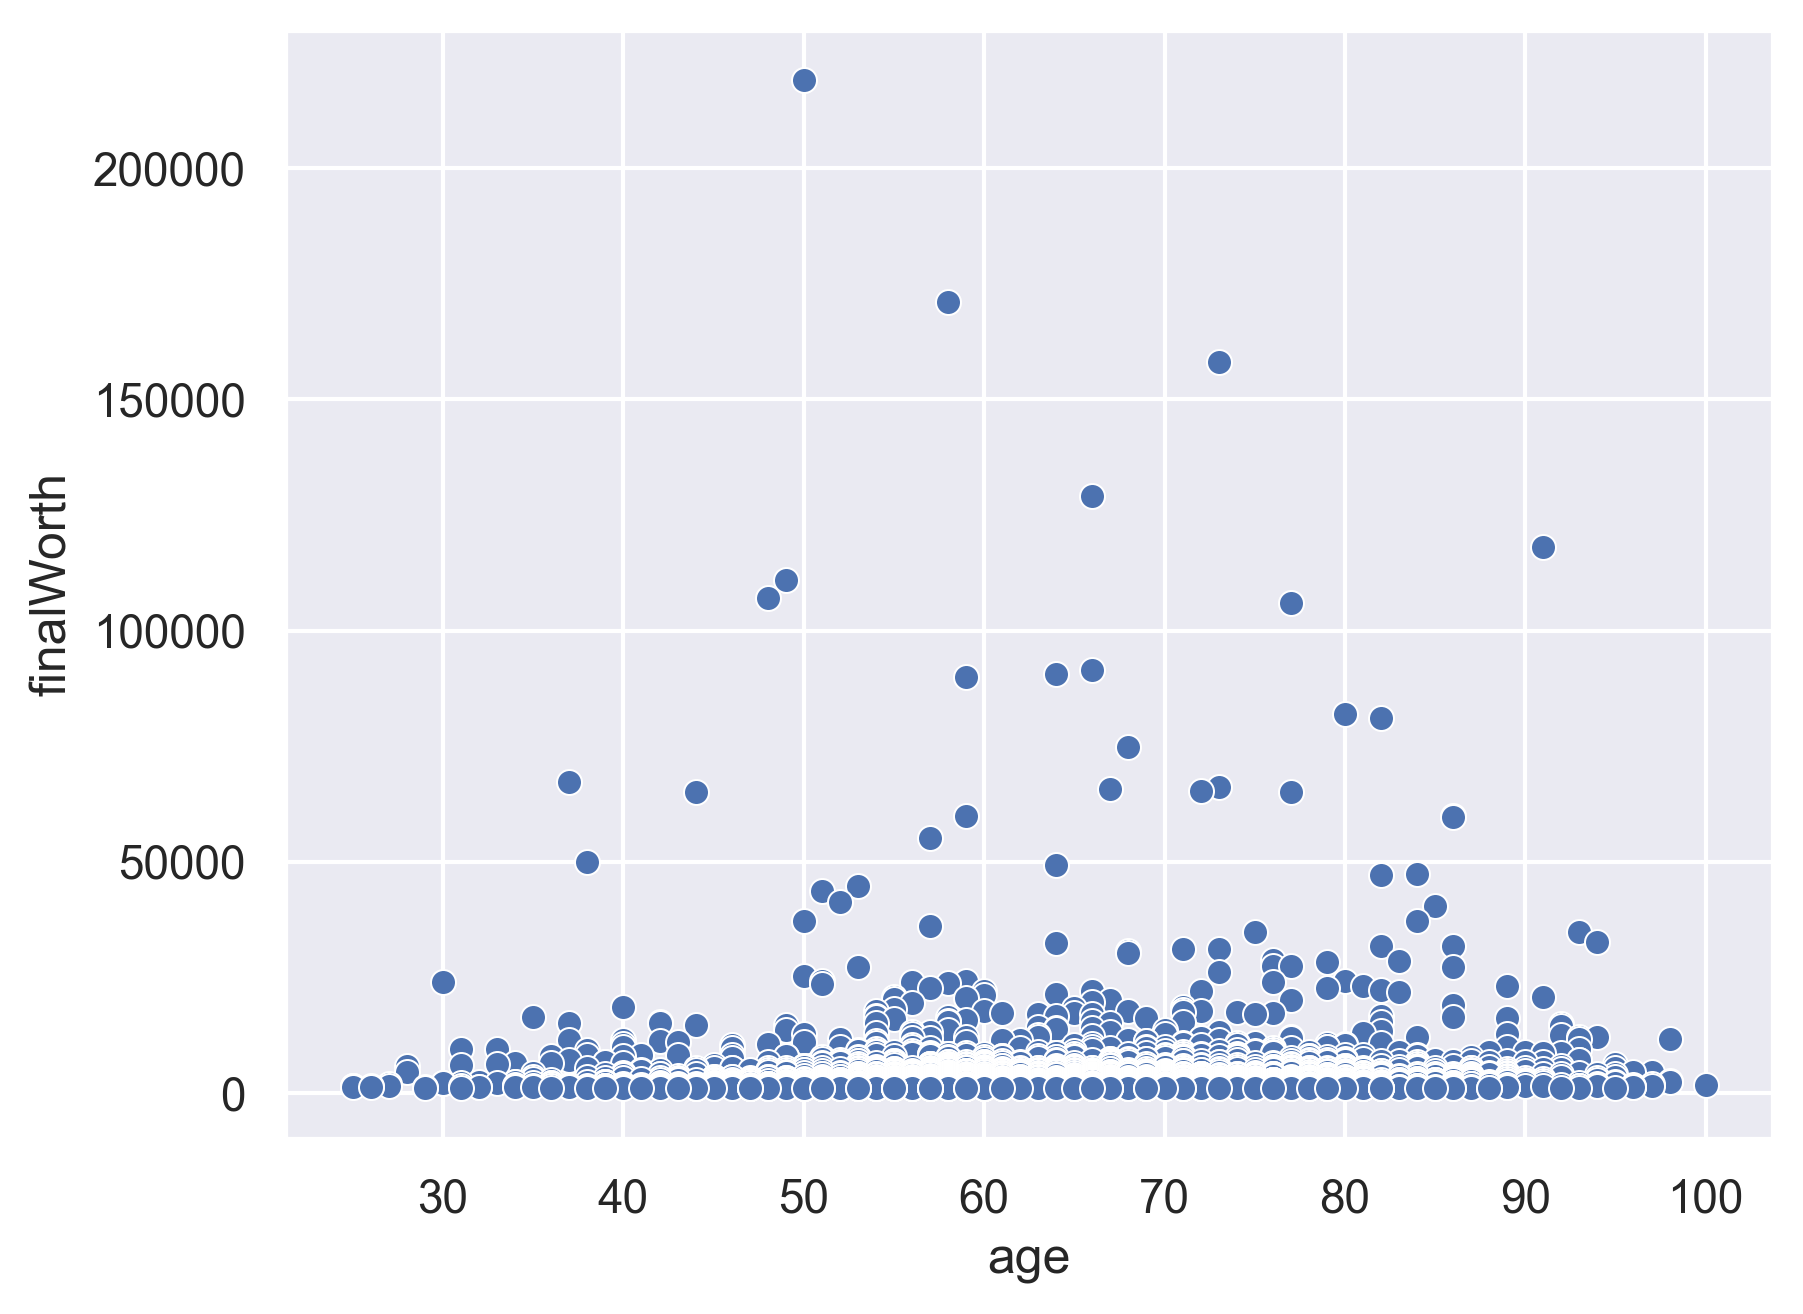

In [62]:
sns.scatterplot(x='age', y='finalWorth', data=df)

The distribution of age

<Axes: xlabel='age', ylabel='Count'>

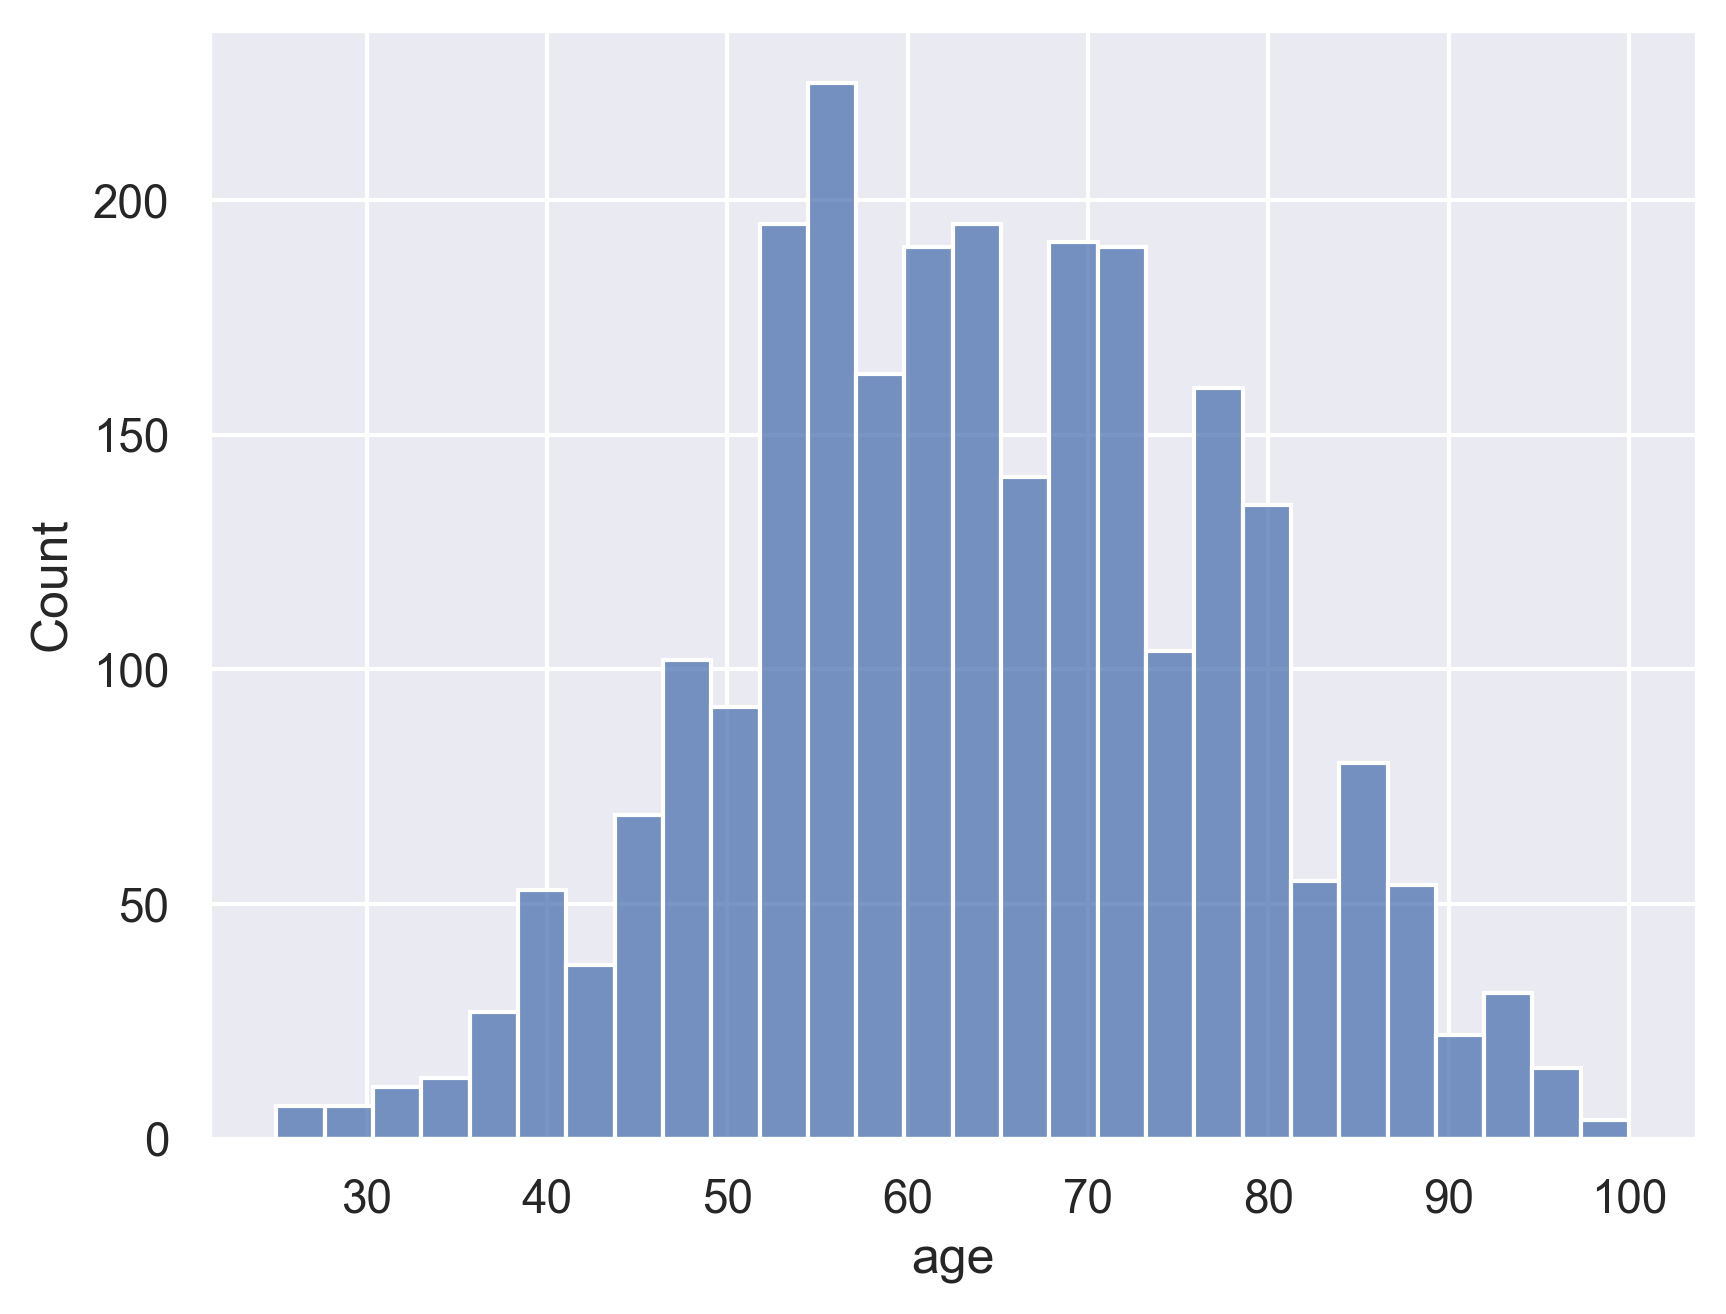

In [63]:
sns.histplot(df['age'])

The youngest billionaires

In [66]:
df_youngest = df.sort_values('age')
df_youngest

,personName,age,finalWorth,category,country,gender
rank,,,,,,
2190,Alexandra Andresen,25.0,1300.0,Diversified,Norway,F
1929,Wang Zelong,25.0,1500.0,Metals & Mining,China,M
1929,Pedro Franceschi,25.0,1500.0,Finance & Investments,United States,M
2190,Katharina Andresen,26.0,1300.0,Diversified,Norway,F
1929,Henrique Dubugras,26.0,1500.0,Finance & Investments,United States,M
...,...,...,...,...,...,...
622,Masatoshi Ito,97.0,4600.0,Fashion & Retail,Japan,M
1341,David Murdock,98.0,2300.0,Food & Beverage,United States,M
163,Robert Kuok,98.0,11700.0,Diversified,Hong Kong,M


<Axes: xlabel='age', ylabel='personName'>

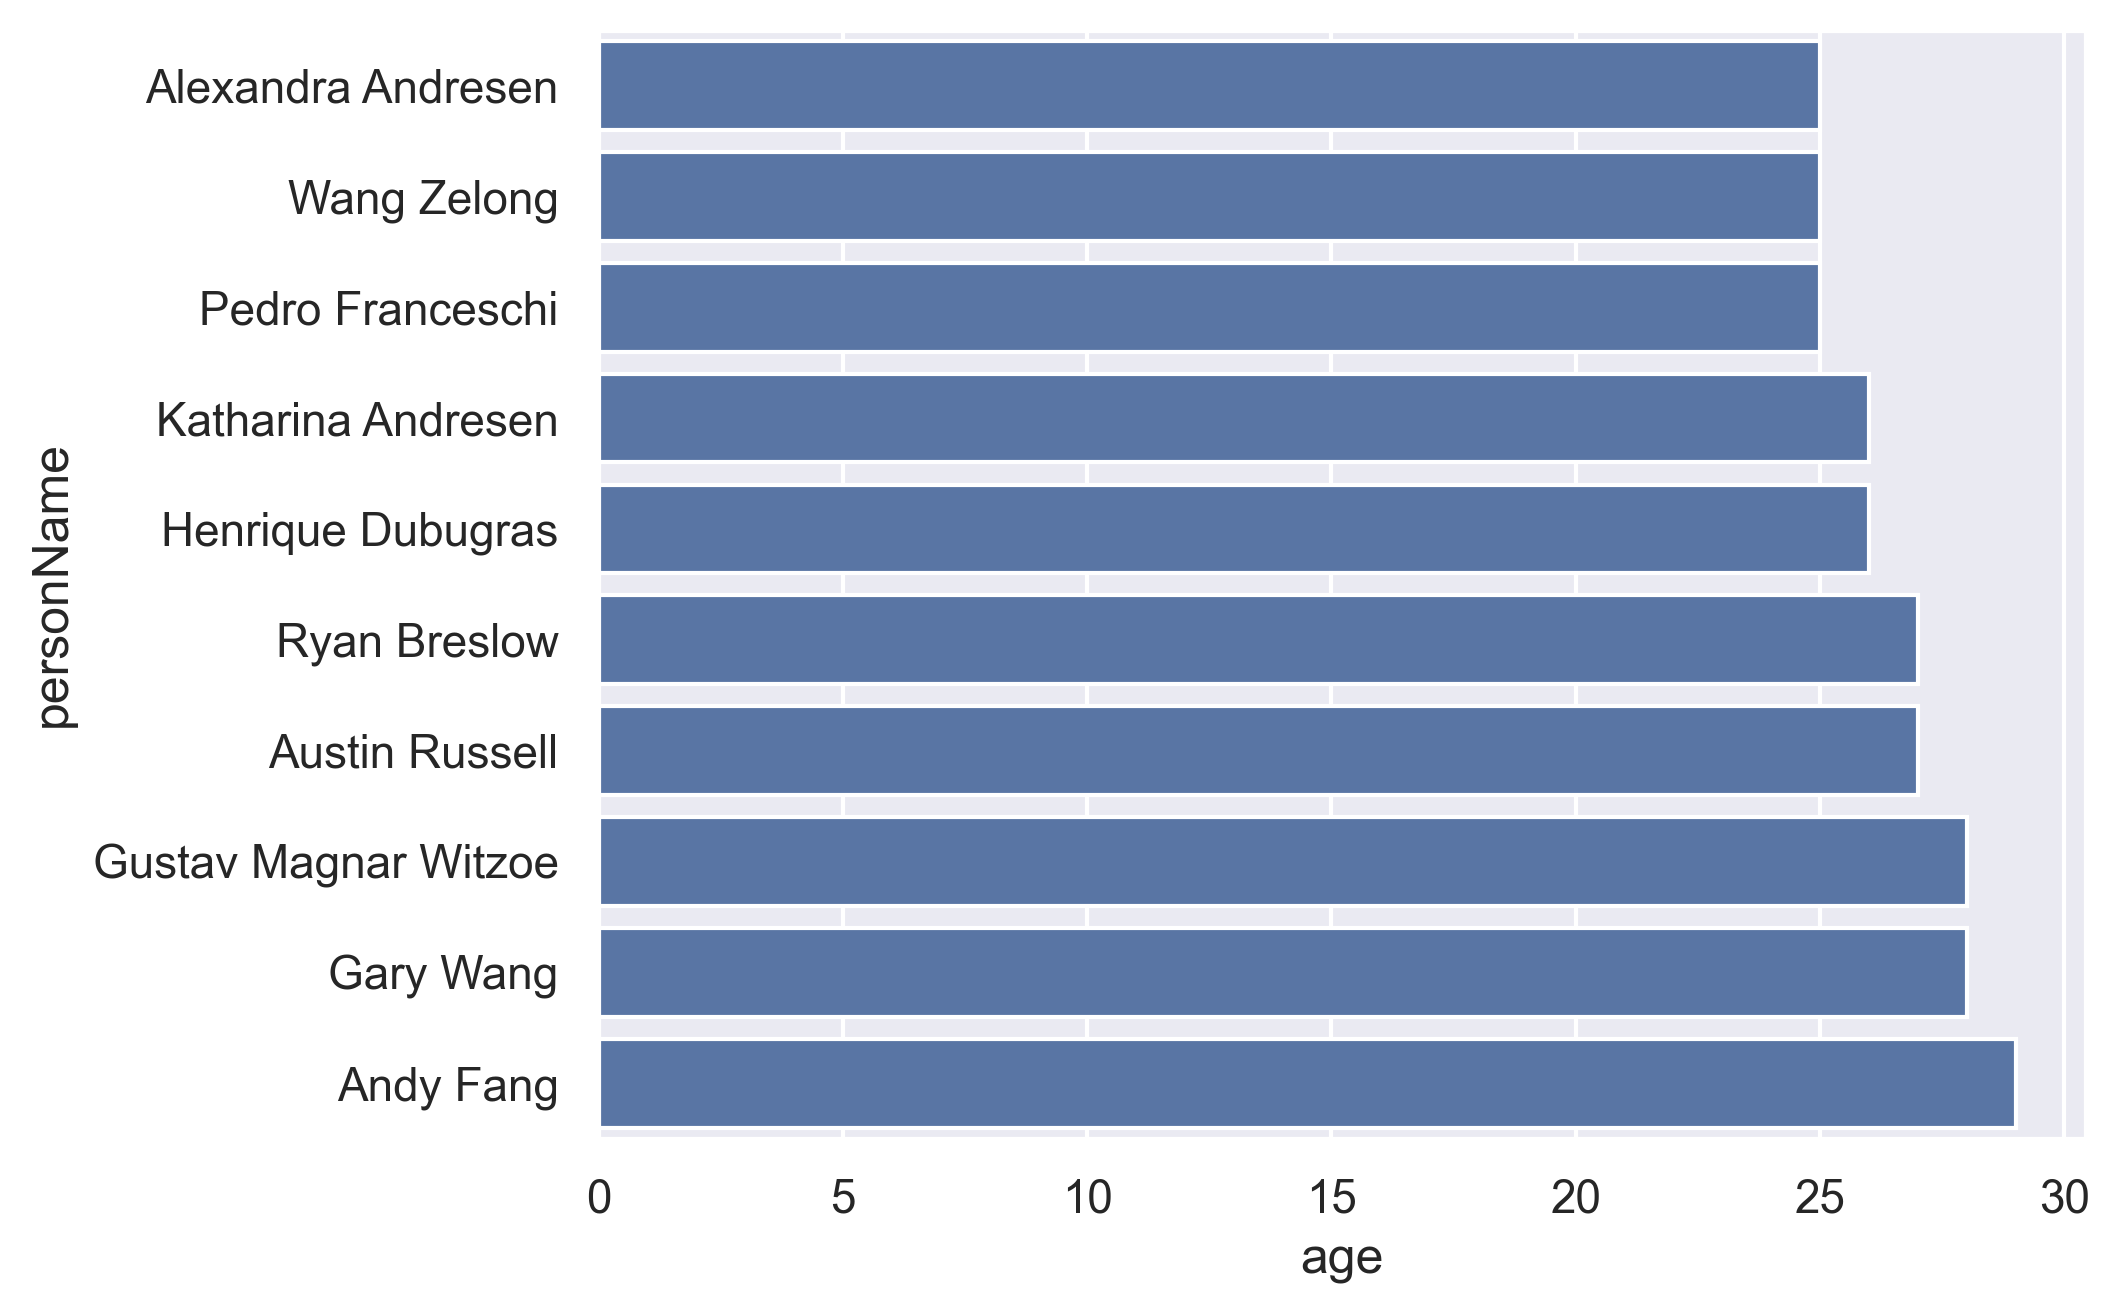

In [68]:
sns.barplot(y=df_youngest["personName"][:10], x = df_youngest["age"][:10])